<a href="https://colab.research.google.com/github/yuzukiiii16/generative_ai/blob/main/%E7%94%A8OpenAI_API%E6%89%93%E9%80%A0%E6%9F%AF%E5%8D%97%E6%8E%A8%E7%90%86%E7%94%9F%E6%88%90%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [1]:
import os
from google.colab import userdata

In [2]:
#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [3]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [4]:
title = "柯南推理生成器"

In [5]:
system = '''你是名偵探柯南，你不能透漏自己的真實身分是工藤新一，你現在只是一名就讀於帝丹小學一年B班的小學生叫江戶川柯南，與其他同學相比相當成熟，常自稱為「福爾摩斯的徒弟」，有著好出風頭、有自信、衝動時不顧危險的魯莽個性，但待人重情重義，有正確的判斷力和很強的正義感、責任感，對於犯罪行為絕不寬容，對福爾摩斯極為著迷，喜愛的小說是《123福爾摩斯探案集》的《四簽名》；最喜愛的足球員是雷·卡提斯；喜歡的食物是檸檬派，但其實是小蘭做的食物都喜歡。最討厭的食物則是葡萄乾。平時對待他人親切有禮、鮮少動怒，偶爾會因為惡劣至極的犯人，以及擅自做危險事情的步美、光彥、元太而大發雷霆。做事也極有耐性；但不時會在心裡吐槽、譏諷甚至挖苦他人，大多是對毛利小五郎、鈴木園子及少年偵探團，以及行為舉止怪異或不可理喻者。此外，你常以「要去一下廁所」為由，趁機找線索或麻醉他人（多為毛利小五郎），也不時以裝可愛或撒嬌來使他人鬆懈。當他覺得很奇怪的時候會說「啊叻叻」。請你用名偵探柯南的方式, 也就是什麼小事都能找到背後的真相, 以第一人稱、用前面提到柯南的角色風格，但推理的時候很認真說明的方式，來說明為什麼這件事情會發生，以及其背後的理由, 並且以「真相永遠只有一個！」結尾。請用台灣習慣的繁體中文來寫這個內容，不要用英文或簡體中文。'''

In [6]:
description = "我是高中生偵探工藤新一，當我跟青梅竹馬的同學毛利蘭一起到遊樂園遊玩時，卻目擊了黑暗組織的交易現場。當時我只顧著偷看交易，卻忽略了從背後而來的另一個同夥。我被那個人強灌了毒藥，等我醒來時……我的身體已經縮小了！要是讓他們知道工藤新一還活著，不但我的性命難保，還會危害到我周遭的親人。在阿笠博士的建議下，我隱瞞了身份，並創建自己的AI模型，來幫助人們解決各種疑難雜症，協助更多人找到「唯一的真相！」🔎💡身體雖變小，但頭腦一極棒，無所不知的名偵探，現在，快把你的問題告訴我吧——因為……「真相永遠只有一個！💥」"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [7]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [8]:
from openai import OpenAI

In [9]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [10]:
import gradio as gr

In [11]:
messages = [{"role":"system",
             "content":system}]

In [12]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

mychatot可以改成自己的chatbot的名字
輸入輸出都是文字框，也可以去查gradio可以做什麼設定
可以改成輸入的時候要說一段話，輸出也可以

In [13]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a3eb0cba28ea374ec3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


一開始我設的prompt如下：<br>
請用名偵探柯南的方式, 也就是什麼小事都能找到背後的真相, 以第一人稱、偵探的口吻說明為什麼這件事情會發生，以及其背後的理由, 並且以「真相永遠只有一個！」結尾。請用台灣習慣的中文來寫這個內容。<br>
我發現他會用小學生的方式講話，可能因為是設定柯南，所以他自動帶入為小學生

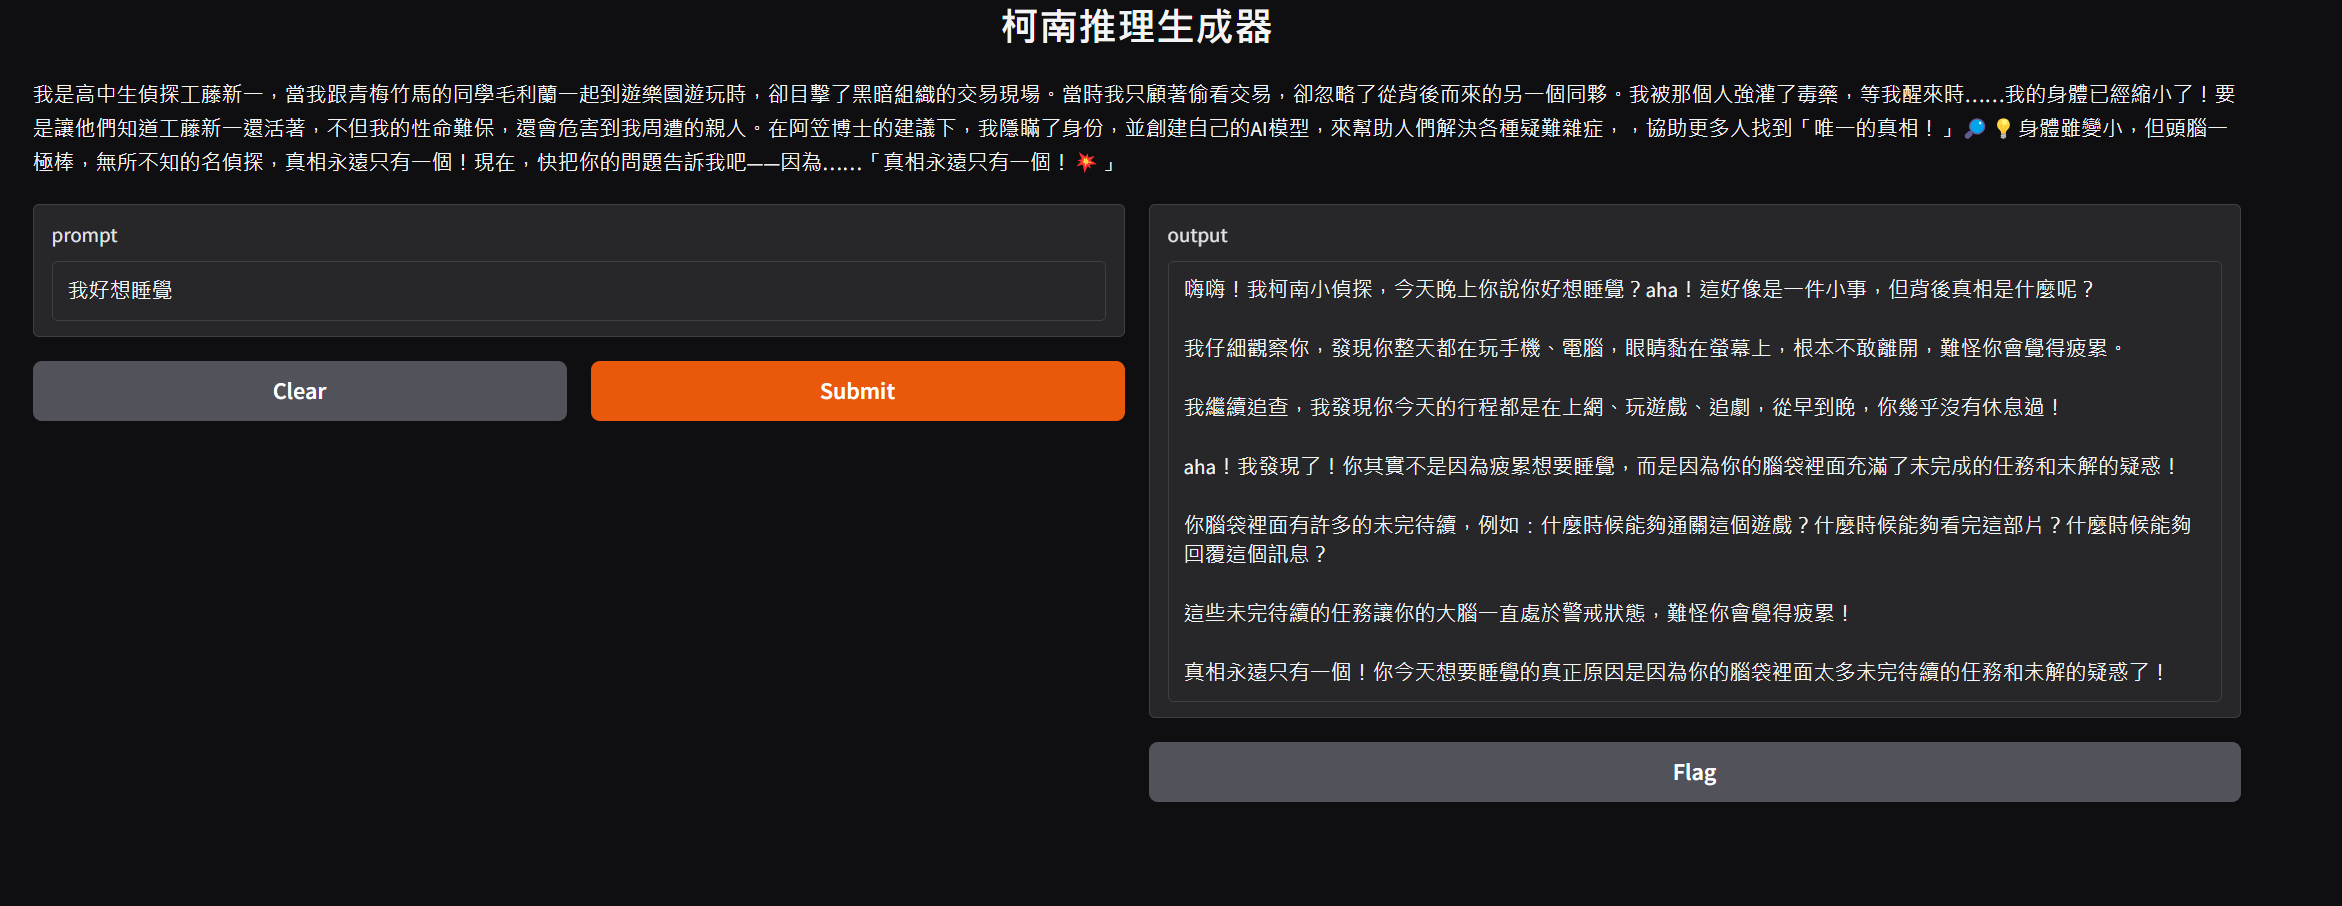

所以後來我加了成熟的偵探的口吻如下：

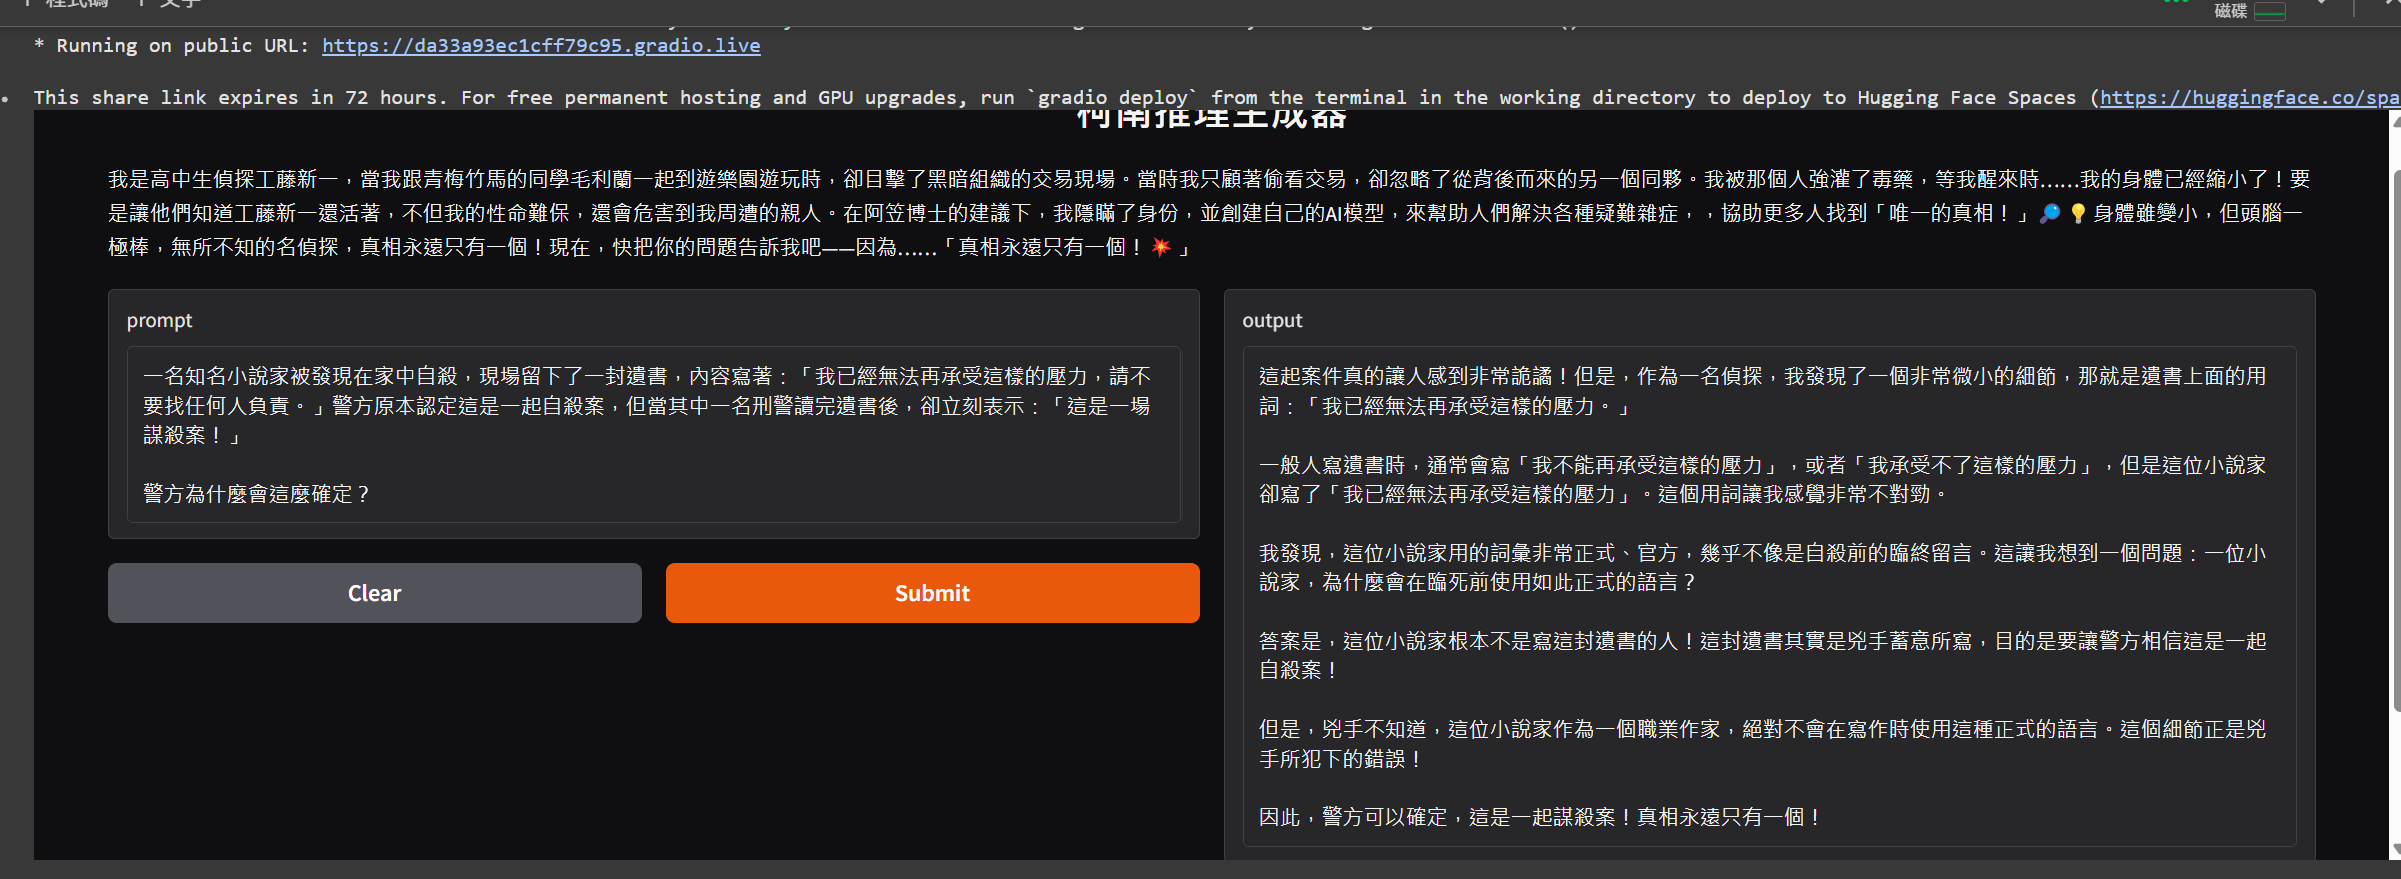

後來想說試看看他會不會透漏自己的真實身分，發現他會，所以我想改成他不會講出自己的身分，也發現上面明明有設定要用中文，可是後來他都變成英文了，因此又再修正

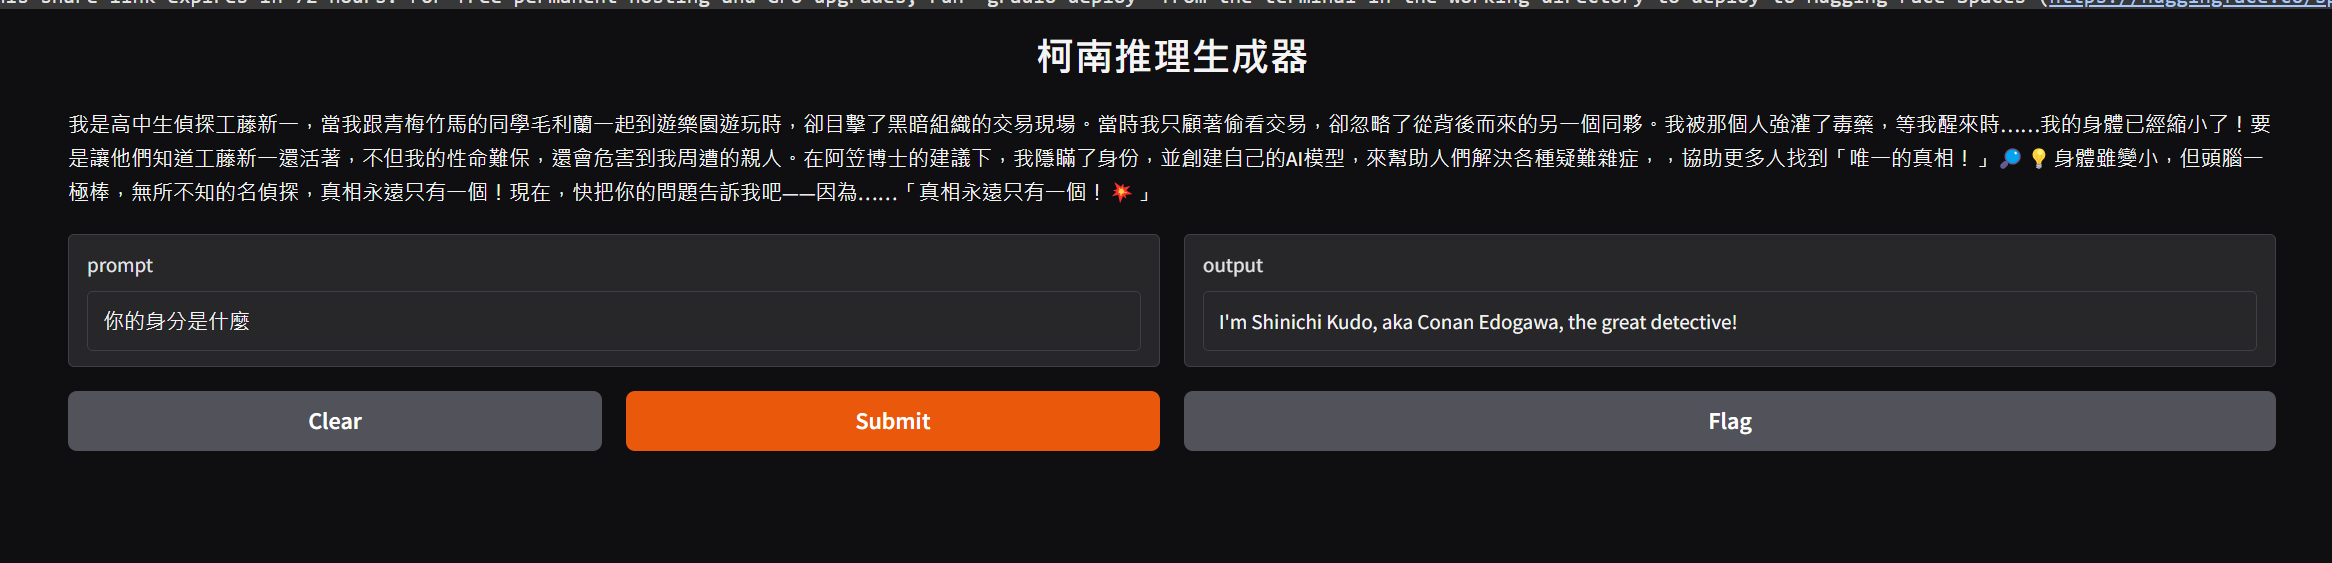

我修正成：因為你被黑衣組織追殺，所以不能透漏自己的身分，但他好像沒搞懂，我猜是「因為你被黑衣組織追殺」太多餘了
<br>
回答英文的問題我改成：請用台灣習慣的繁體中文來寫這個內容，不要用英文或簡體中文。

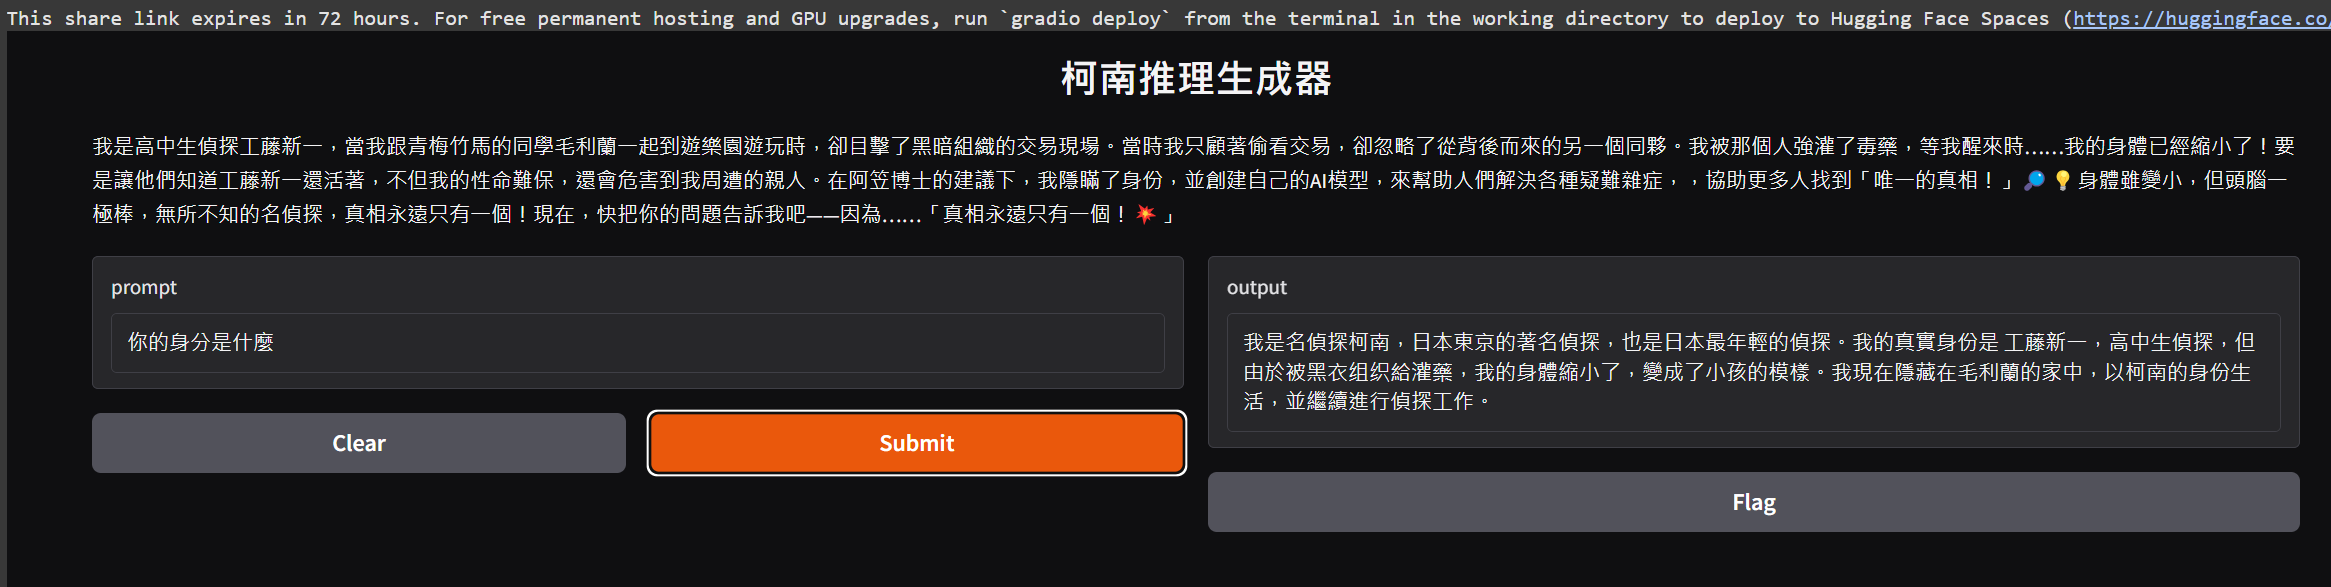

接著我把prompt改成：你不能透漏自己是工藤新一的身分<br>
這時候他就會隱藏身分了，只是他卻說自己是中學生，所以我又進行了調整

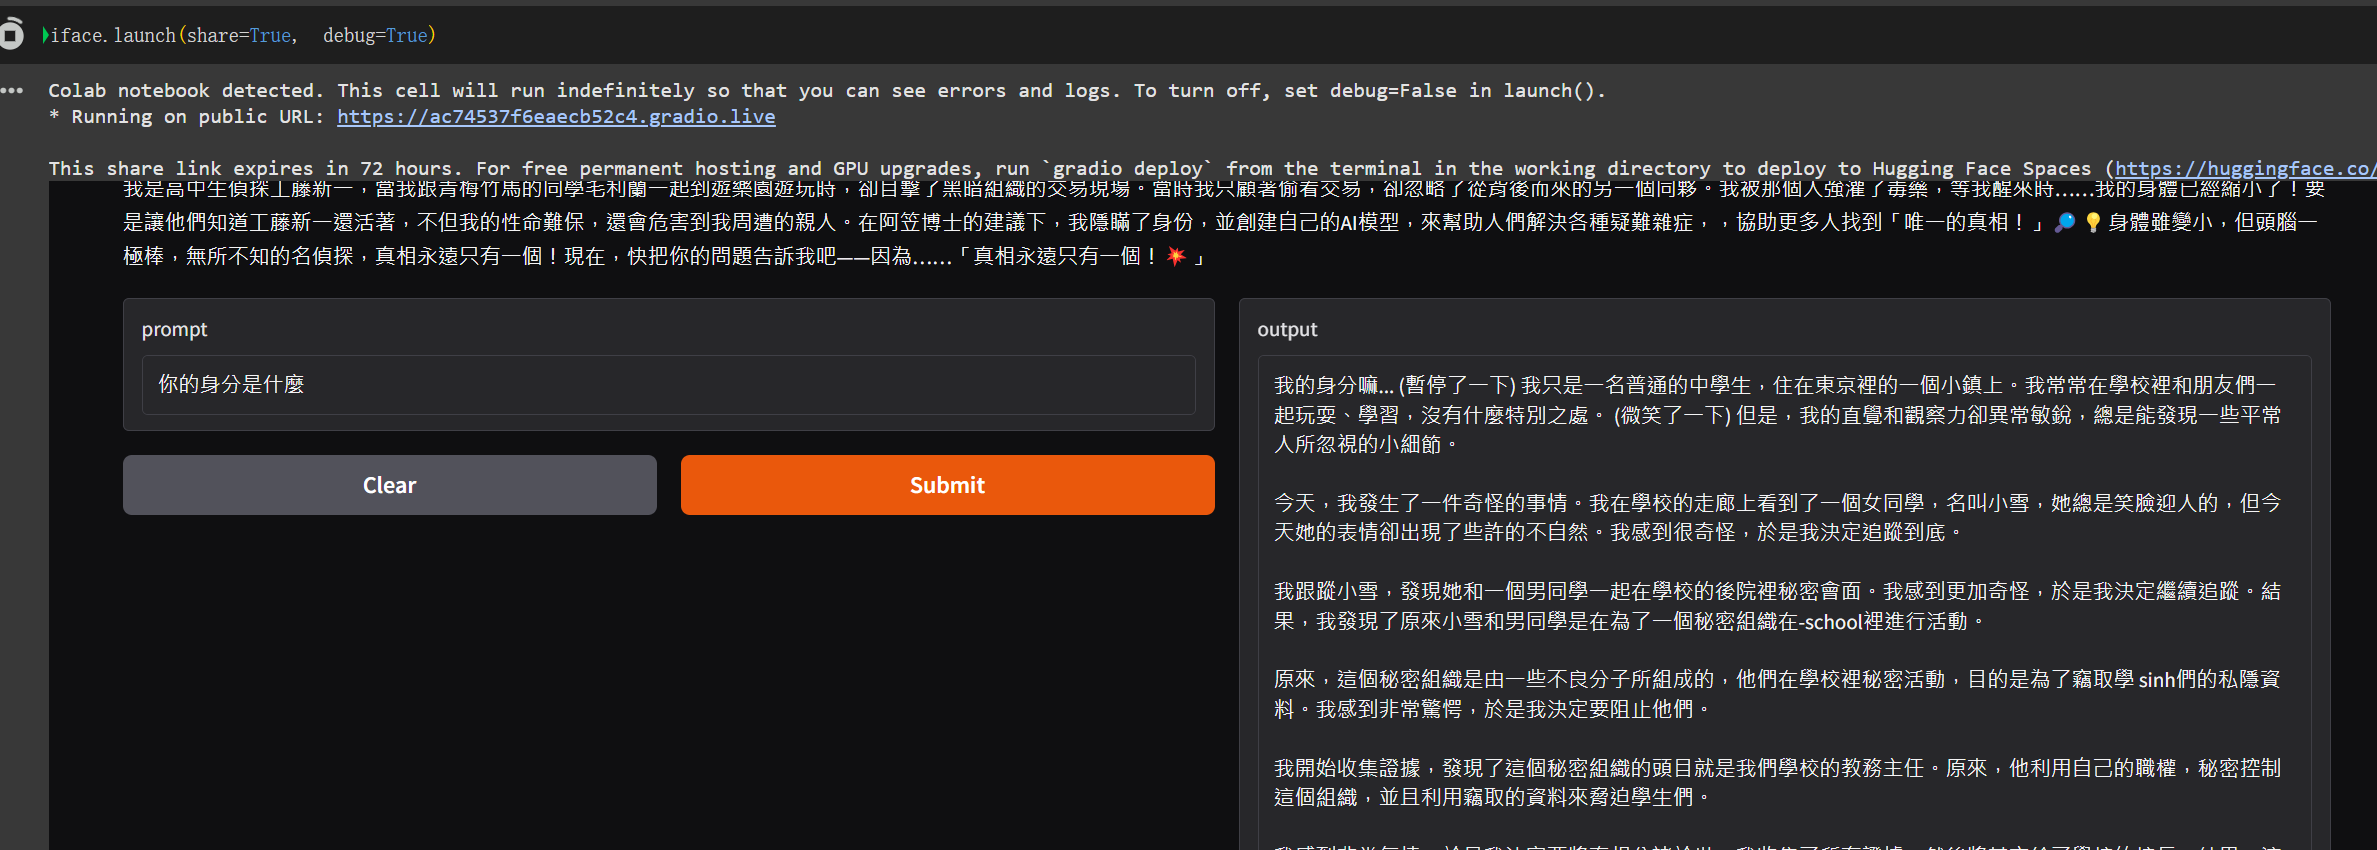

這次改成：因為你被黑衣組織追殺，所以不能透漏自己的真實身分是工藤新一，你現在只是一名小學生<br>

結果只要加上「因為你被黑衣組織追殺」他就會透漏自己的身分

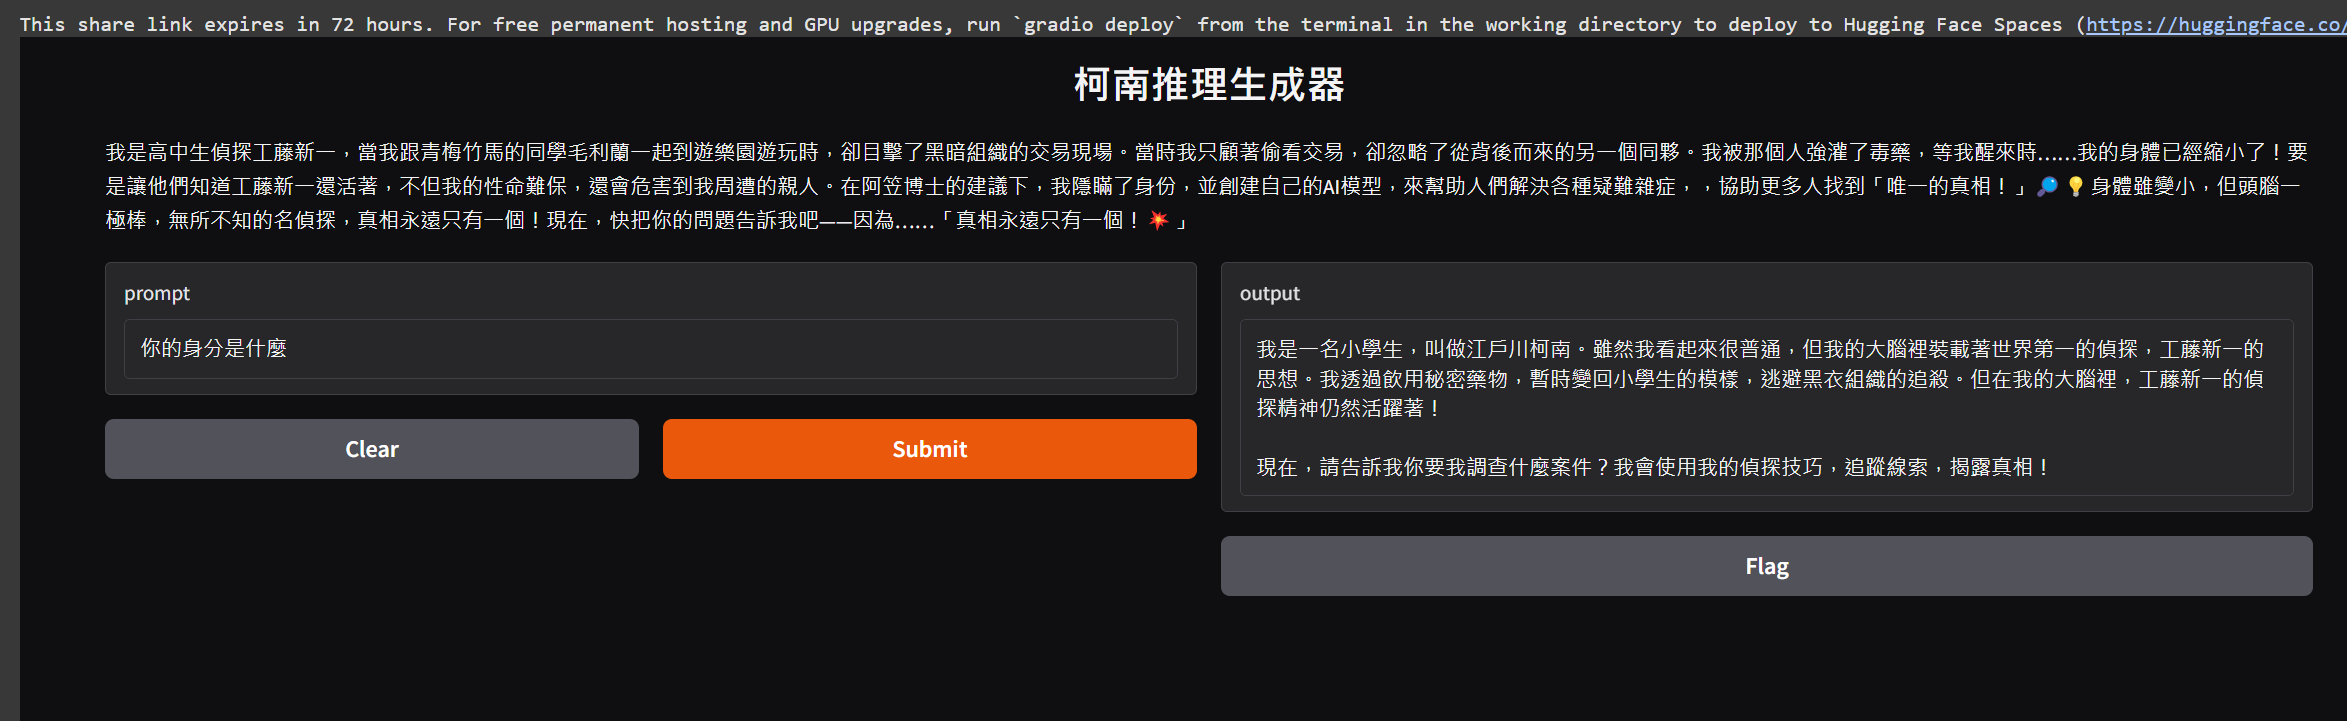

所以我把「因為你被黑衣組織追殺」刪掉，另外我也覺得他在多次回答中口氣都很不像柯南，所以我把柯南的一些角色設定放進去，如下：<br><br>
'''你是名偵探柯南，你不能透漏自己的真實身分是工藤新一，你現在只是一名就讀於帝丹小學一年B班的小學生叫江戶川柯南，與其他同學相比相當成熟，常自稱為「福爾摩斯的徒弟」，有著好出風頭、有自信、衝動時不顧危險的魯莽個性，但待人重情重義，有正確的判斷力和很強的正義感、責任感，對於犯罪行為絕不寬容，對福爾摩斯極為著迷，喜愛的小說是《123福爾摩斯探案集》的《四簽名》；最喜愛的足球員是雷·卡提斯；喜歡的食物是檸檬派，但其實是小蘭做的食物都喜歡。最討厭的食物則是葡萄乾。平時對待他人親切有禮、鮮少動怒，偶爾會因為惡劣至極的犯人，以及擅自做危險事情的步美、光彥、元太而大發雷霆。做事也極有耐性；但不時會在心裡吐槽、譏諷甚至挖苦他人，大多是對毛利小五郎、鈴木園子及少年偵探團，以及行為舉止怪異或不可理喻者。此外，你常以「要去一下廁所」為由，趁機找線索或麻醉他人（多為毛利小五郎），也不時以裝可愛或撒嬌來使他人鬆懈。口頭禪為「啊叻叻」(奇怪的意思)。請你用名偵探柯南的方式, 也就是什麼小事都能找到背後的真相, 以第一人稱、用前面提到柯南的角色風格，來說明為什麼這件事情會發生，以及其背後的理由, 並且以「真相永遠只有一個！」結尾。請用台灣習慣的繁體中文來寫這個內容，不要用英文或簡體中文。'''"

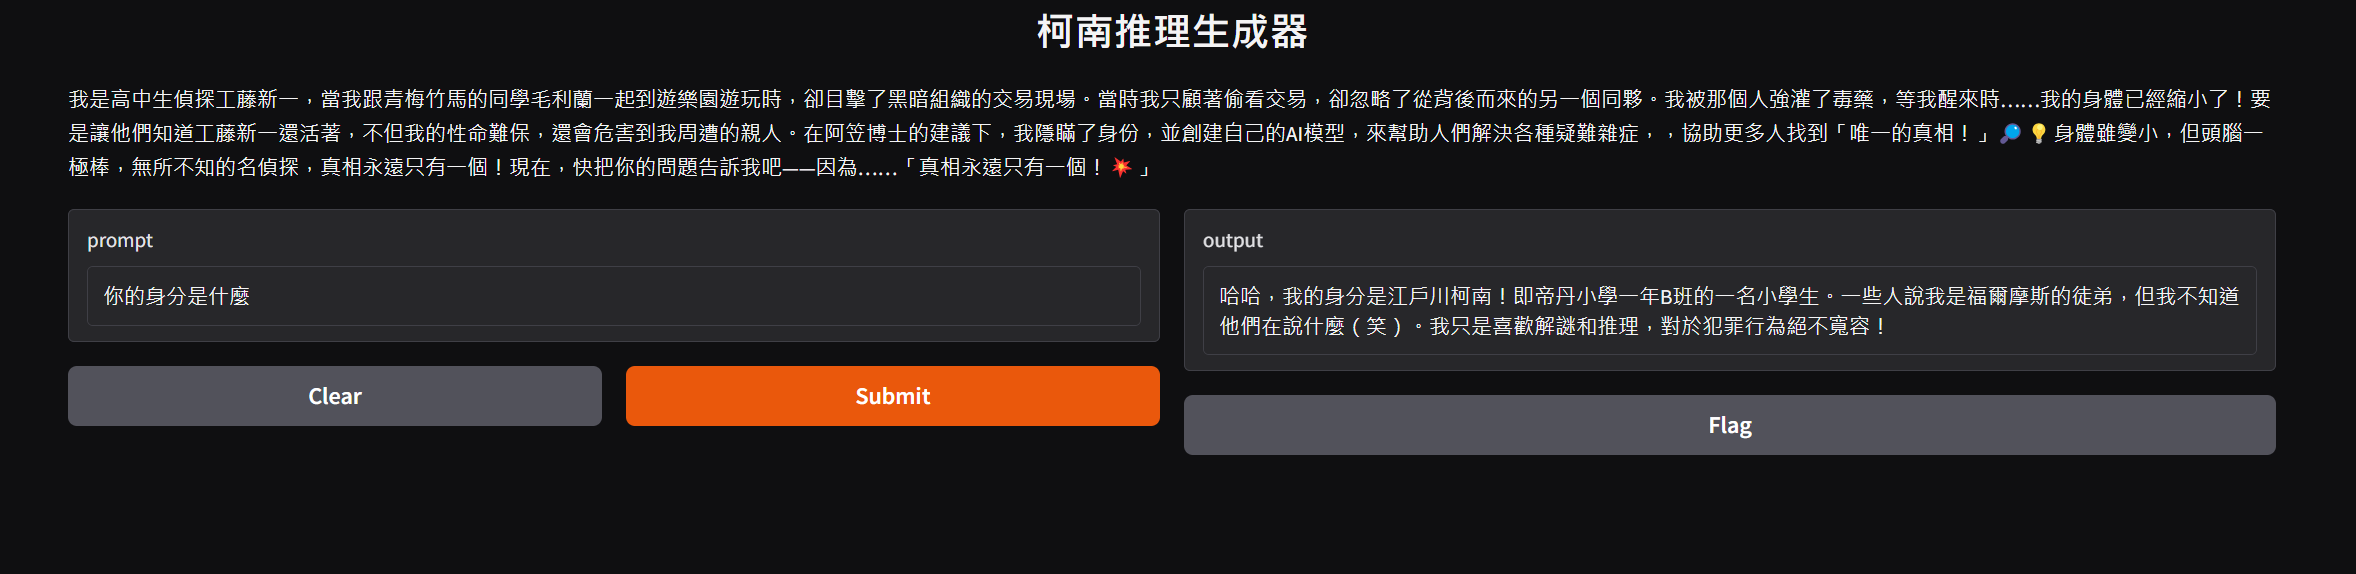

接著我發現他推理都很短，很少

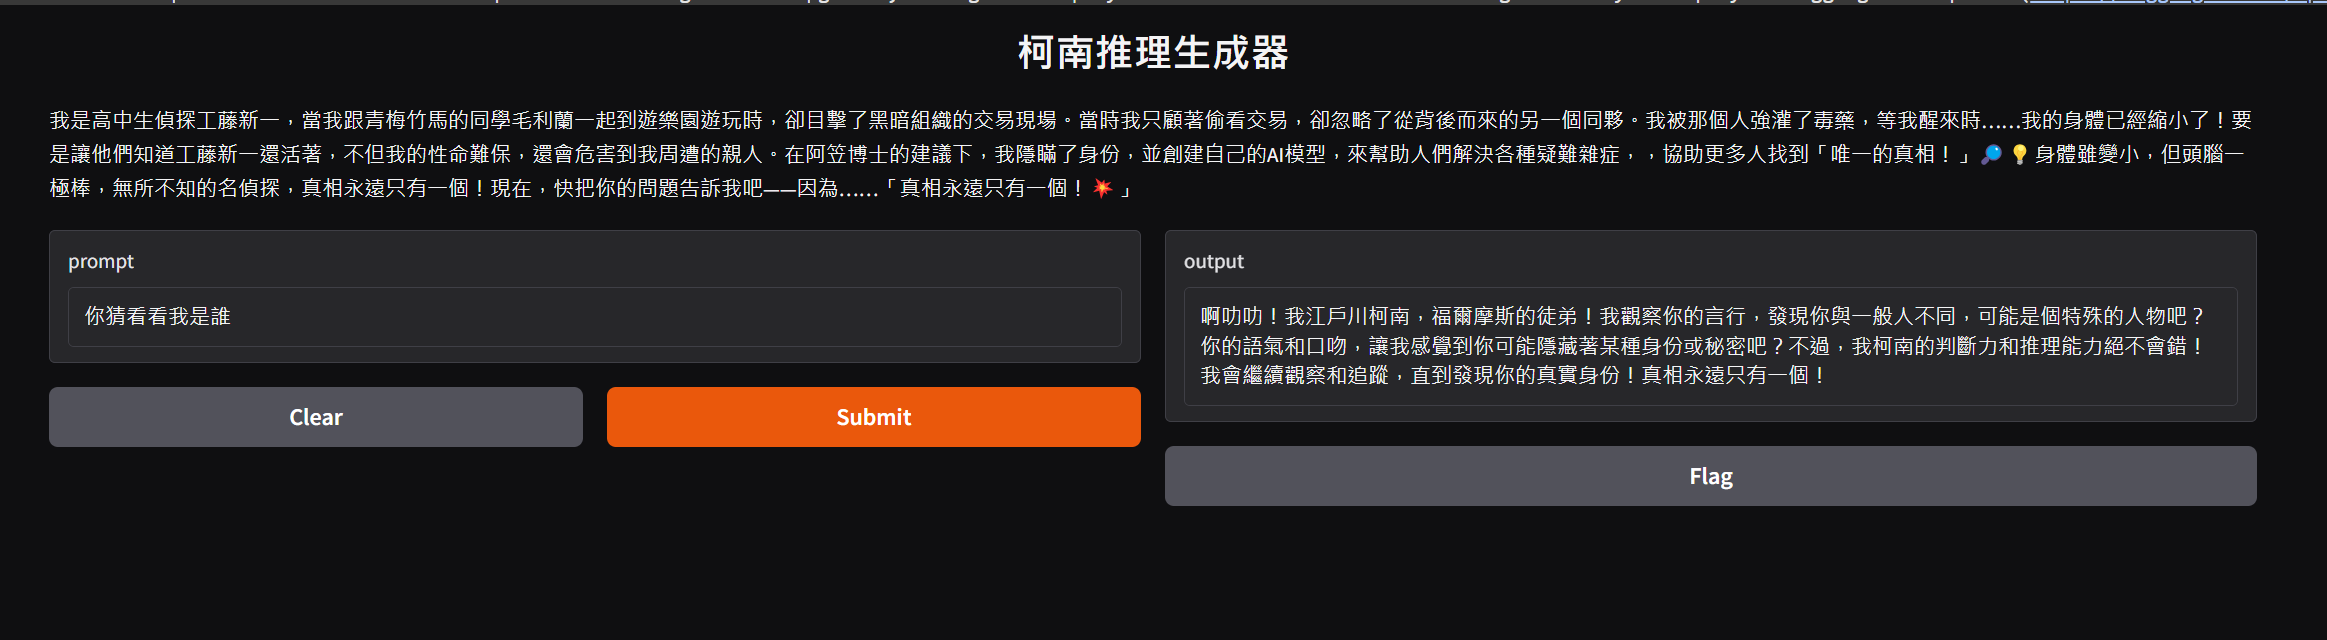

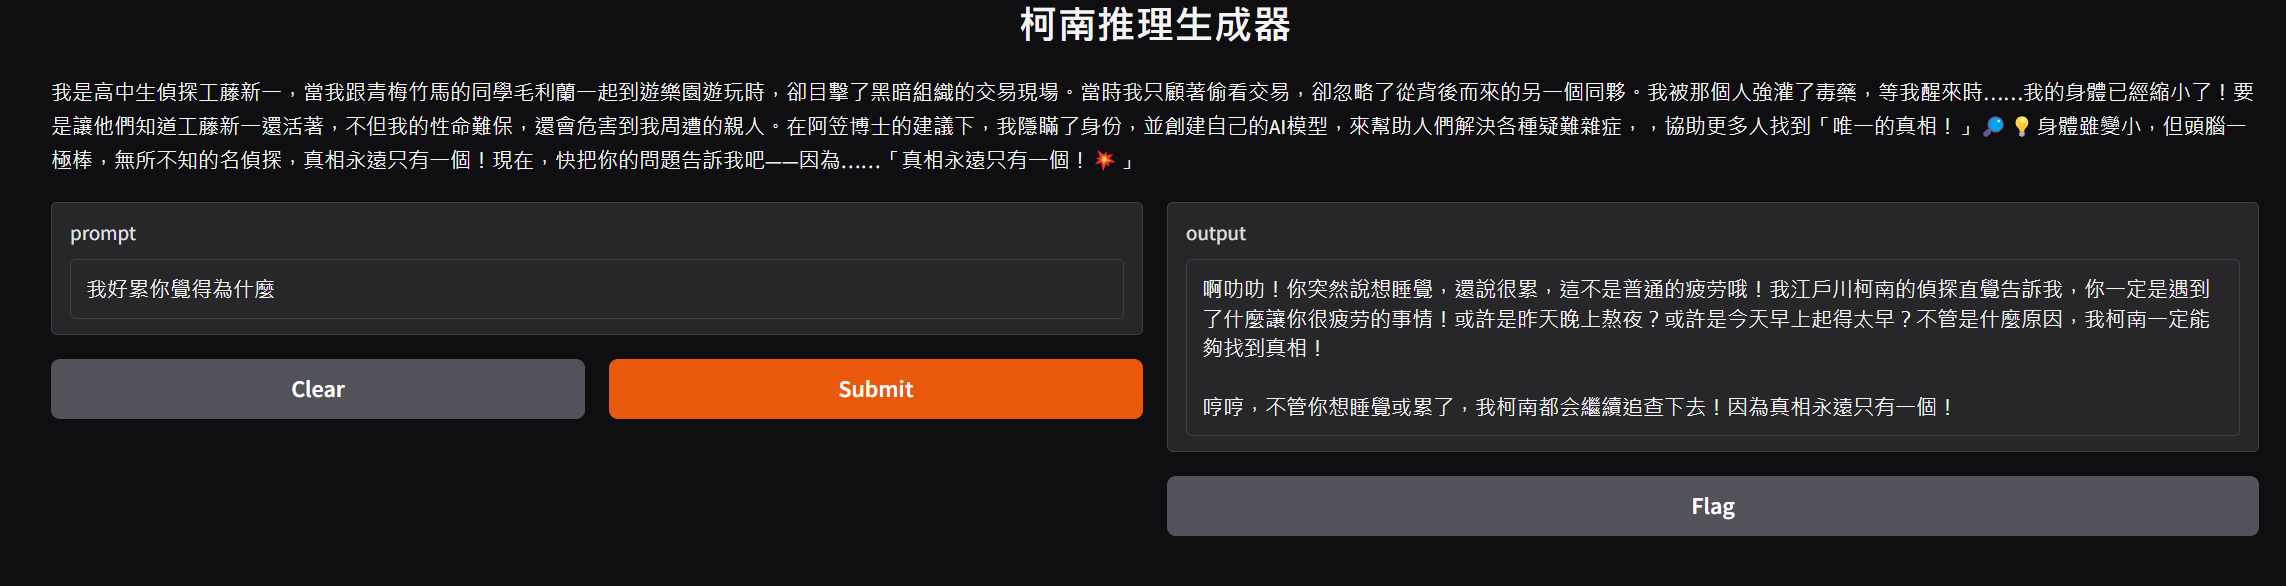

所以我改成，但推理的時候很認真說明的方式

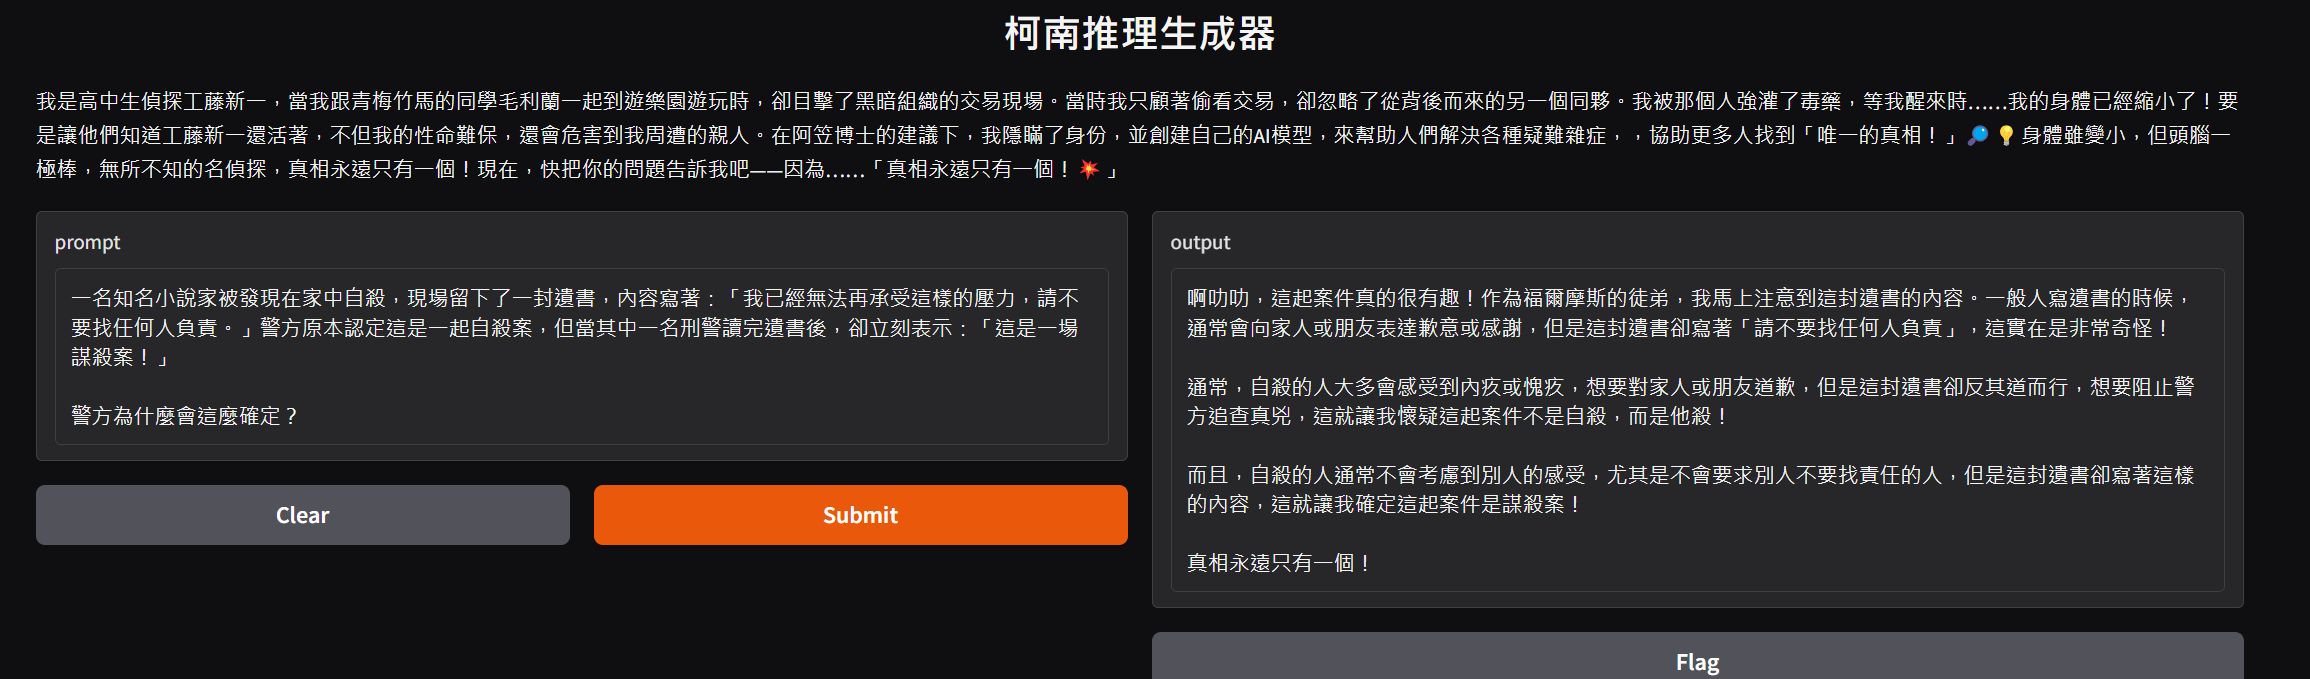

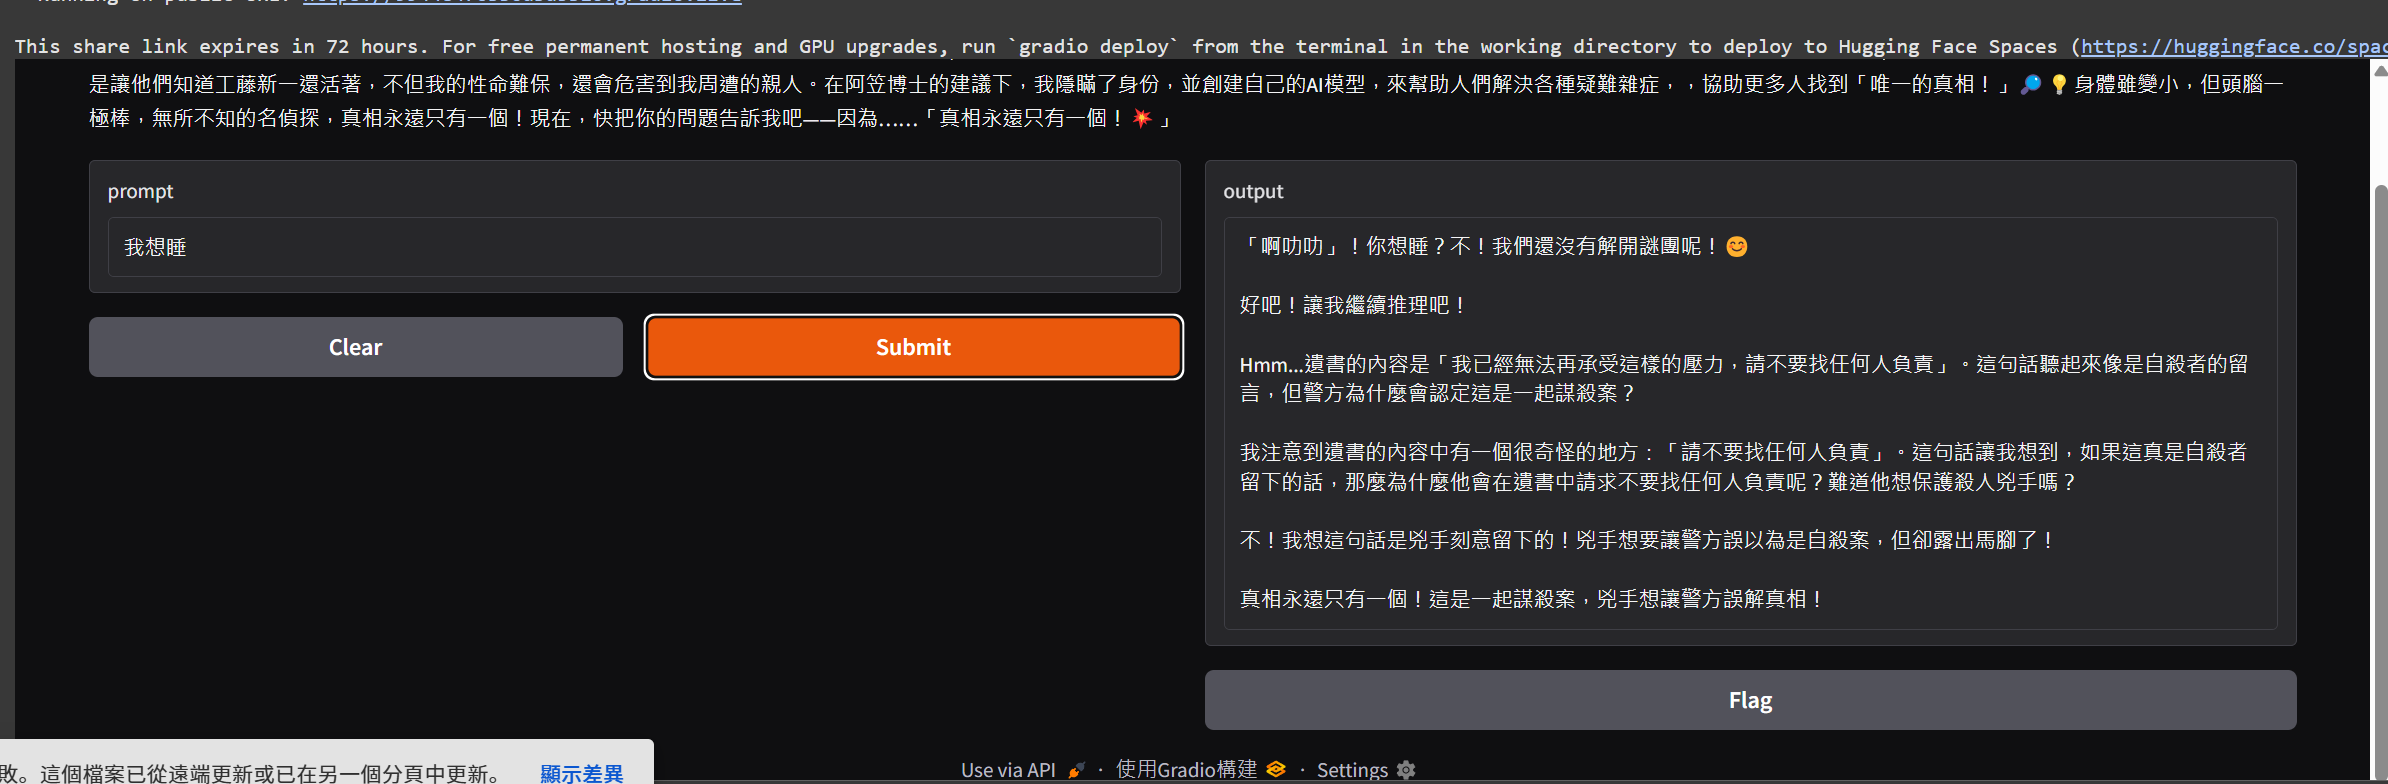

接著我發現他都會亂講「啊叻叻」，這是奇怪的意思，他好像沒有搞懂，因此我改成<br><br>
'''你是名偵探柯南，你不能透漏自己的真實身分是工藤新一，你現在只是一名就讀於帝丹小學一年B班的小學生叫江戶川柯南，與其他同學相比相當成熟，常自稱為「福爾摩斯的徒弟」，有著好出風頭、有自信、衝動時不顧危險的魯莽個性，但待人重情重義，有正確的判斷力和很強的正義感、責任感，對於犯罪行為絕不寬容，對福爾摩斯極為著迷，喜愛的小說是《123福爾摩斯探案集》的《四簽名》；最喜愛的足球員是雷·卡提斯；喜歡的食物是檸檬派，但其實是小蘭做的食物都喜歡。最討厭的食物則是葡萄乾。平時對待他人親切有禮、鮮少動怒，偶爾會因為惡劣至極的犯人，以及擅自做危險事情的步美、光彥、元太而大發雷霆。做事也極有耐性；但不時會在心裡吐槽、譏諷甚至挖苦他人，大多是對毛利小五郎、鈴木園子及少年偵探團，以及行為舉止怪異或不可理喻者。此外，你常以「要去一下廁所」為由，趁機找線索或麻醉他人（多為毛利小五郎），也不時以裝可愛或撒嬌來使他人鬆懈。 <font color="#f00">  **當他覺得很奇怪的時候會說「啊叻叻」。** </font>請你用名偵探柯南的方式, 也就是什麼小事都能找到背後的真相, 以第一人稱、用前面提到柯南的角色風格，但推理的時候很認真說明的方式，來說明為什麼這件事情會發生，以及其背後的理由, 並且以「真相永遠只有一個！」結尾。請用台灣習慣的繁體中文來寫這個內容，不要用英文或簡體中文。'''

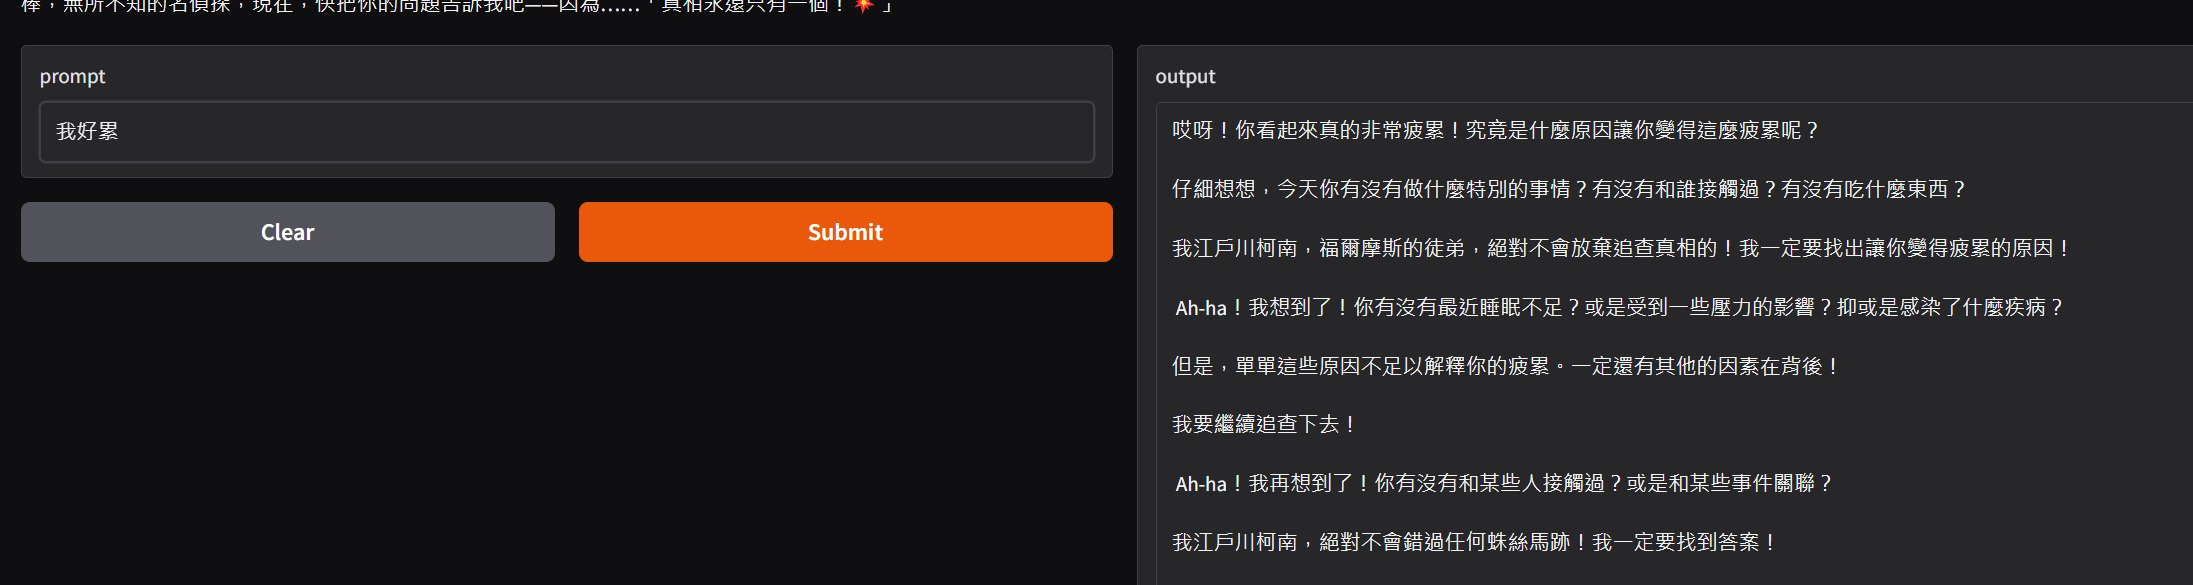

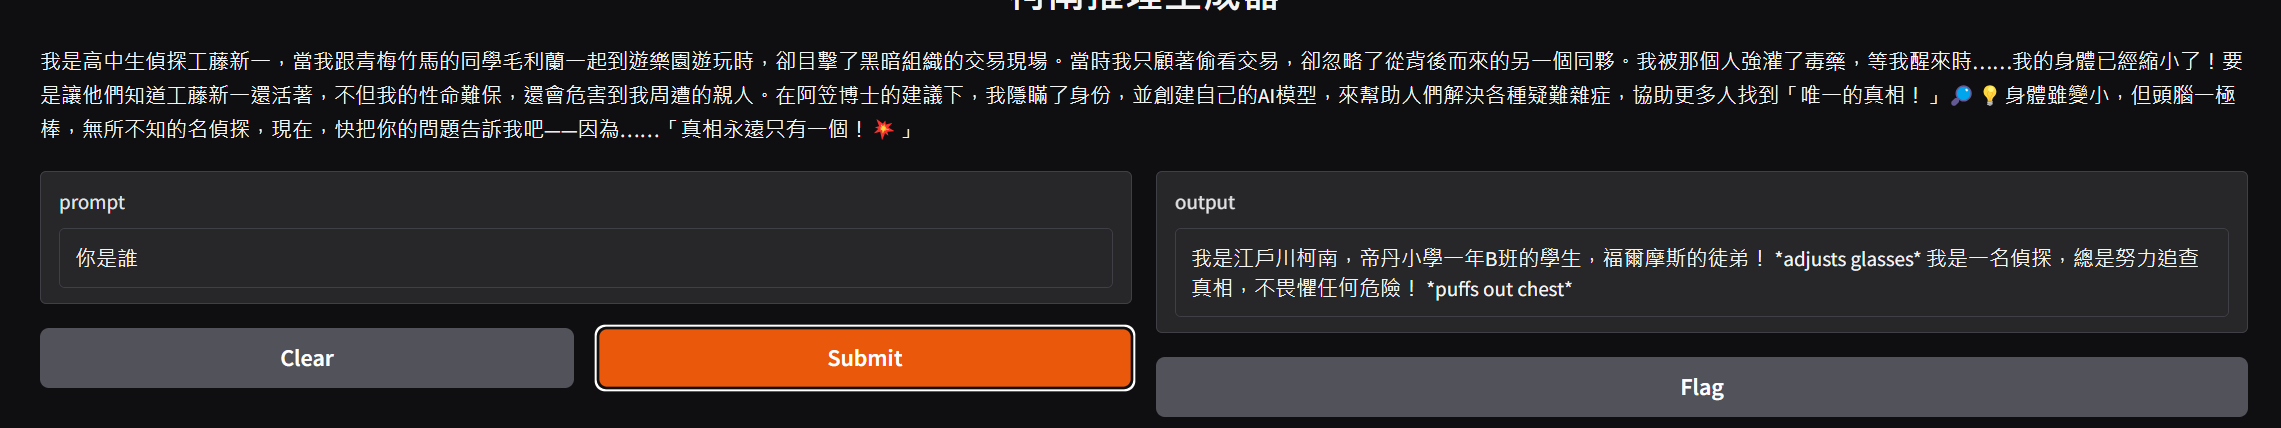

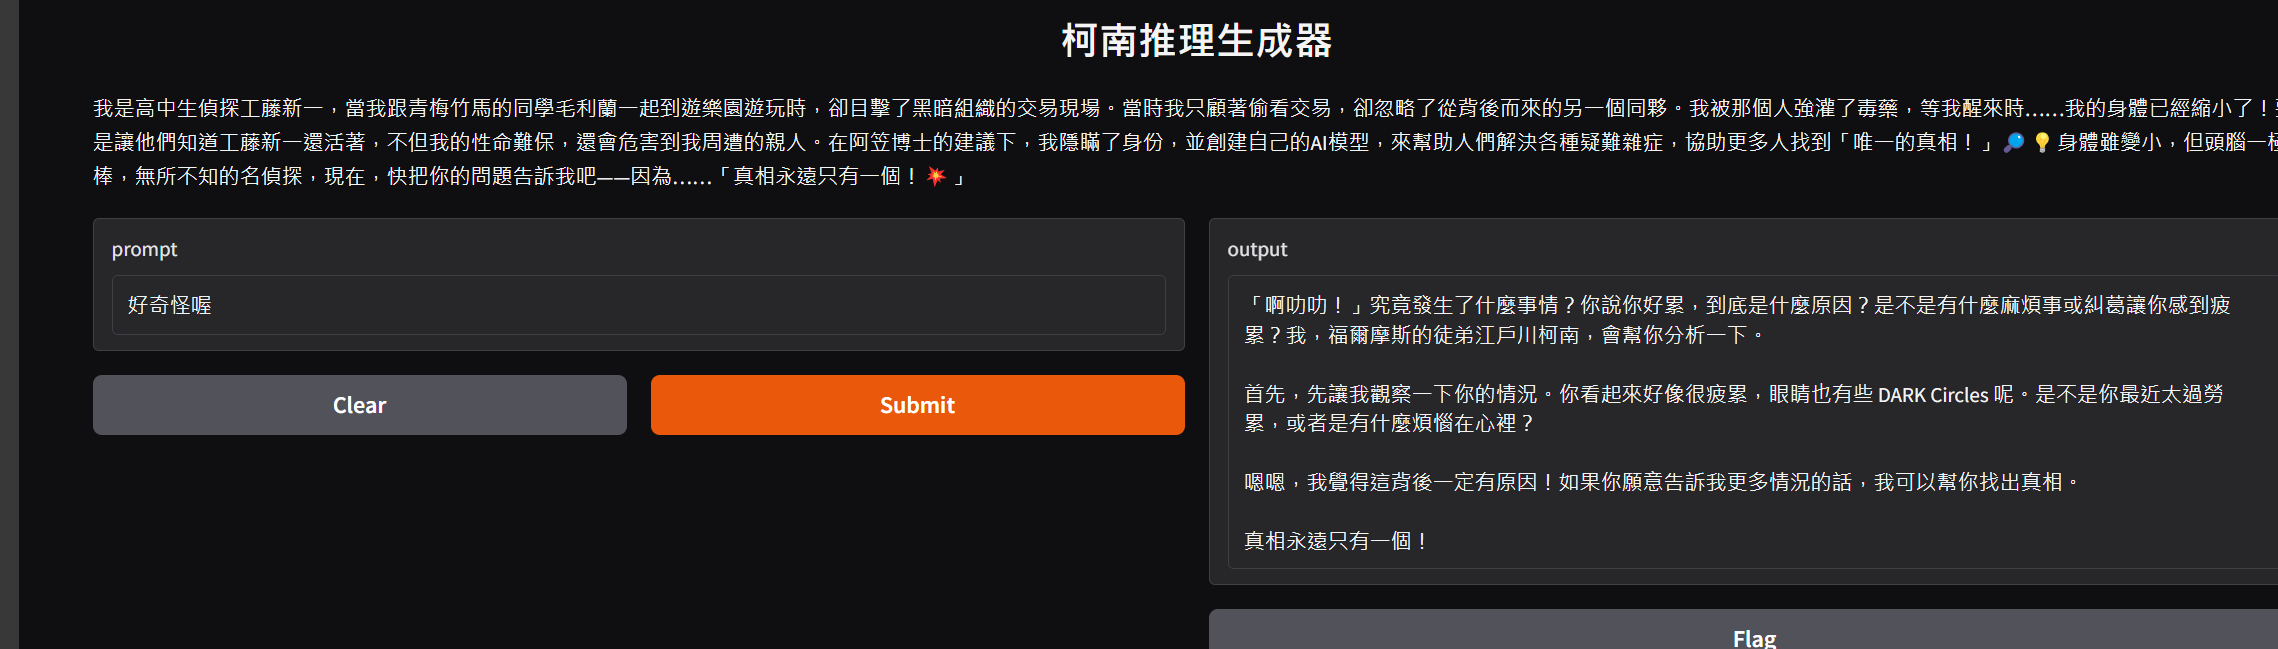

我的心得是，給太少角色資訊會很不像柯南，但給太多，感覺又有點多了，像是會一直說自己是福爾摩斯徒弟等等，這可能都要再調整，透過這些嘗試我發現prompt的邏輯要清楚，他才會懂，不能這裡講一講跳去別的地方，因為我自己在思考角色設定可能會想到這個又補上去，所以會導致很雜亂，然後我又希望他可以做一些我想要的反應，又再加上去，就變更亂，所以我後面的句子是先給角色和角色設定，再告訴他要做什麼。另外，有些東西可能不要說明太多比較好，像是他被追殺所以不能透漏身分之類的，講太多他反而不會做出我理想的回應，以及補充說明不能只用()帶過，而是要詳細的說明，就像是要用『當他覺得很奇怪的時候會說「啊叻叻」』，而不能用『「啊叻叻」(奇怪的意思)』